# Amazon consumer electronics product performance for the year 2019
## By Maxwell Chinemebudu Chimela
This project is based on using some of the basic python analytics libraries to manipulate and clean and visualise data generated from amazon sales in 2019. Using these packages i was about to extract insight about the performance of products sold by amazon in the consumer electronics section. For this project i got the data set for each month in th year 2019 from kaggle. you can view the dataset [here](https://www.kaggle.com/datasets/knightbearr/sales-product-data?resource=download)

The libraries I used for this projects are:
* Numpy :- for caculation
* pandas :- for Data cleaning and manipulation
* Matplotlib and Seaborn :- for visualisation

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. LOADING THE DATA
The dataset for each month where all loaded and stored in their respective variables

In [2]:
jan_sales = pd.read_csv("../amazon_sales/Sales_January_2019.csv")
feb_sales = pd.read_csv("../amazon_sales/Sales_February_2019.csv")
mar_sales = pd.read_csv("../amazon_sales/Sales_March_2019.csv")
apr_sales = pd.read_csv("../amazon_sales/Sales_April_2019.csv")
may_sales = pd.read_csv("../amazon_sales/Sales_May_2019.csv")
jun_sales = pd.read_csv("../amazon_sales/Sales_June_2019.csv")
jul_sales = pd.read_csv("../amazon_sales/Sales_July_2019.csv")
aug_sales = pd.read_csv("../amazon_sales/Sales_August_2019.csv")
sep_sales = pd.read_csv("../amazon_sales/Sales_September_2019.csv")
oct_sales = pd.read_csv("../amazon_sales/Sales_October_2019.csv")
nov_sales = pd.read_csv("../amazon_sales/Sales_November_2019.csv")
dec_sales = pd.read_csv("../amazon_sales/Sales_December_2019.csv")

In [3]:
# Joining the all data together
year_sales = pd.concat([jan_sales, feb_sales, mar_sales, apr_sales, may_sales, jun_sales, jul_sales, 
                        aug_sales, sep_sales, oct_sales, nov_sales, dec_sales])

In [4]:
# Previewing the data
year_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
# number of rows
year_sales.shape[0]

186850

In [6]:
# number of columns
year_sales.shape[1]

6

### Data Description

The dataset has a total of 186,850 rows and 6 columns.

The columns are:

* **Order ID** :- Id for each order place.
* **Product** :- Product being ordered.
* **Quantity Ordered** :- number of product ordered.
* **Price each** :- The unit price for each price order.
* **Purchase Address** :- The address of the customer that placed the order.


## 2. DATA CLEANING
used the pandas library to clean and manipulate the data types

In [7]:
# Renaming the `Price Each` column
year_sales.rename(columns = {"Price Each": "Unit Price"}, inplace = True)

In [8]:
# checking the statistics
year_sales.describe().T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Unit Price,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


In [9]:
# Checking for datatypes and missing values
year_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Unit Price          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
# Checking for missing values
year_sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Unit Price          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
# Dropping the rows with missing values
year_sales = year_sales.dropna(how = 'all')

In [12]:
idx = year_sales[year_sales.Product == "Product"].index  # Saving the row number of the row containing product in idx
year_sales = year_sales.drop(idx) # Dropping the row from the dataframe

In [13]:
# creating a columns for month and hour respectively
year_sales["month"] = year_sales["Order Date"].str[:2]
year_sales["hour"] = year_sales["Order Date"].str[9:11]


In [14]:
# Type casting the `Unit Price` and `Quantity Ordered` columns
year_sales["Unit Price"] = pd.to_numeric(year_sales["Unit Price"]) 
year_sales["Quantity Ordered"] = pd.to_numeric(year_sales["Quantity Ordered"])

# Typecasting the Order Date column to datetime 
year_sales["Order Date"] = pd.to_datetime(year_sales["Order Date"])

In [15]:
# selecting and keeping just the months in 2019
mask = (year_sales["Order Date"] >= "2019-01-01") & (year_sales["Order Date"] <= "2019-12-31")
year_sales = year_sales.loc[mask] # keeping just only dates that are within the year 2019

In [16]:
# Adding an Id, Sales, City, and State columns to the dataframe
year_sales["Id"] = year_sales.index + 1
year_sales["Sale"] = year_sales["Quantity Ordered"] * year_sales["Unit Price"]

# The line below strips of cities and States respectively from purchase address 
year_sales["City"] = year_sales["Purchase Address"].astype(str).apply(lambda x: x.split(",")[1])
year_sales["State"] = year_sales["Purchase Address"].astype(str).apply(lambda x: x.split(",")[2])

# converts the id to an integer 
year_sales.Id = year_sales.Id.astype(int)

In [17]:
# Saving the data to csv format to be visualised in tableau 
year_sales.to_csv('../amazon_sales/Amazon_Sales_2019.csv')

## 3. Performance analysis for the year.
The visualisation below to answer some questions. To view the dashboard in tableau click [here](https://public.tableau.com/app/profile/chinemebudu.maxwell/viz/AmazonConsumerElectronicsDashboard/AmazonReport).

#### a. How much revenue generated in 2019

In [18]:
# code below sums up the total revenue generated 
round(year_sales.Sale.sum(), 0)

33742050.0

#### b. What product has the highest number of of purchase

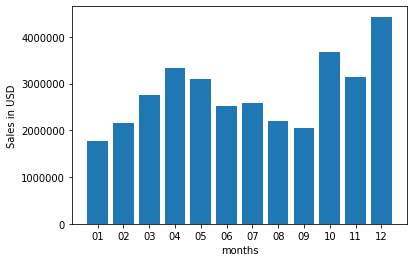

In [19]:
# The block of code below creates a bar chart.
month_sales = year_sales.groupby('month')['Sale'].sum() #groups the sum of sales by sum
months = month_sales.index # takes the months

plt.bar(months, month_sales)
plt.xlabel("months")
plt.ylabel("Sales in USD");

#### c. what city has the most number of sales

In [20]:
# the code block below creates a new column called citi to hold the city 
#and the state abbreviation in bracket.
year_sales["citi"] = year_sales["State"].astype(str).apply(lambda x: x.split(" ")[1])
year_sales["citi"] = year_sales["City"]+"("+year_sales["citi"]+")"


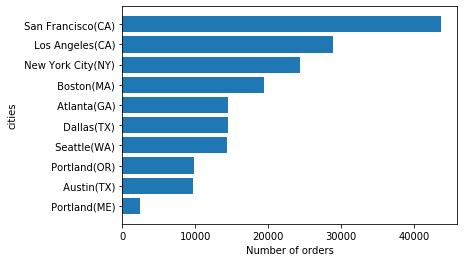

In [21]:
# the code below creates a barchart for the number of orders for each state
no_of_orders = year_sales.groupby('citi')['Order ID'].count().sort_values() 
citi = no_of_orders.index

plt.barh(citi, no_of_orders)
plt.ylabel("cities")
plt.xlabel("Number of orders");

#### d. what product had the most number of sales

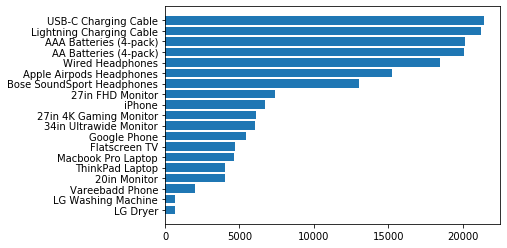

In [22]:
# using value count to get the total number of orders for each product 
y = year_sales["Product"].value_counts().sort_values()
x = y.index # gets the index of the sorted series
plt.barh(x, y);
plt.show()

#### e. when is the best time of the day to advertise
   The best time of the day to advertise should be the times with the highest traffick

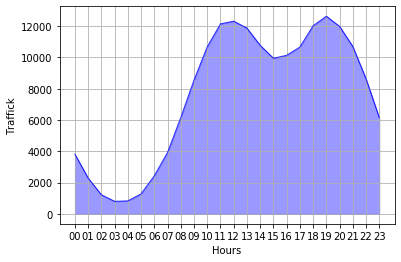

In [23]:
# The code block below creates a line chart of the hourly traffick
hourly_orders = year_sales.groupby('hour')['Order ID'].count()
hour = hourly_orders.index

plt.fill_between(hour, hourly_orders, alpha = 0.4, color = "blue")
plt.plot(hour, hourly_orders, alpha = 0.8, linewidth = 1, color = "blue")
plt.xlabel("Hours")
plt.ylabel("Traffick")
plt.grid(True);